In [19]:
import mysql.connector as base
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [3]:
cnx = base.connect(user='cds', password='itsalldatababy', database='yelp_db')

In [4]:
c = cnx.cursor()

In [5]:
c.execute('SHOW TABLES;')
type_dict={}
for table in c.fetchall():
    c.execute('DESCRIBE {};'.format(table[0]))
    desc = c.fetchall()
    type_dict[table[0]] = pd.Series(["{} : {}".format(r[0], r[1]) for r in desc])
pd.DataFrame(type_dict).fillna("")


,attribute,business,category,checkin,elite_years,friend,hours,photo,review,tip,user
0,business_id : varchar(22),id : varchar(22),business_id : varchar(22),business_id : varchar(22),user_id : varchar(22),user_id : varchar(22),hours : varchar(255),id : varchar(22),id : varchar(22),user_id : varchar(22),id : varchar(22)
1,name : varchar(255),name : varchar(255),category : varchar(255),date : varchar(255),year : char(4),friend_id : varchar(22),business_id : varchar(22),business_id : varchar(22),stars : int(11),business_id : varchar(22),name : varchar(255)
2,value : text,neighborhood : varchar(255),,count : int(11),,,,caption : varchar(255),date : datetime,text : text,review_count : int(11)
3,,address : varchar(255),,,,,,label : varchar(255),text : text,date : datetime,yelping_since : datetime
4,,city : varchar(255),,,,,,,useful : int(11),likes : int(11),useful : int(11)
5,,state : varchar(255),,,,,,,funny : int(11),,funny : int(11)
6,,postal_code : varchar(255),,,,,,,cool : int(11),,cool : int(11)
7,,latitude : float,,,,,,,business_id : varchar(22),,fans : int(11)
8,,longitude : float,,,,,,,user_id : varchar(22),,average_stars : float
9,,stars : float,,,,,,,,,compliment_hot : int(11)


In [6]:
c.execute('SELECT column_name FROM information_schema.columns WHERE table_name="business";')
bcols = [r[0] for r in c.fetchall()]

In [73]:
c.execute('SELECT * FROM business')
b = pd.DataFrame(c.fetchall(), columns=bcols)
b.replace('', np.nan, inplace=True)

In [8]:
b.isnull().sum(axis=0)

id                  0
name                0
neighborhood    94403
address          5167
city                3
state               0
postal_code       553
latitude            1
longitude           1
stars               0
review_count        0
is_open             0
dtype: int64

In [9]:
def count_table(tab, col_ids, count=10):
    common_df = pd.DataFrame(index=range(0,count))
    for col in col_ids:
        tmp = tab[col].value_counts(dropna=False)
        common_df[col] = tmp.astype('str').radd(tmp.index.map(str) + ": ").reset_index(drop=True)
    return common_df

In [10]:
count_table(b, bcols[1:], count=15)

,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,Starbucks: 892,nan: 94403,nan: 5167,Las Vegas: 24768,AZ: 47376,89109: 2812,36.175: 148,-111.926: 766,4.0: 31529,3: 23346,1: 132262
1,McDonald's: 645,Westside: 3237,5757 Wayne Newton Blvd: 87,Phoenix: 15656,NV: 30571,85251: 1882,36.1697: 141,-111.927: 646,3.5: 28610,4: 16448,0: 24377
2,Subway: 607,Southeast: 3082,3200 Las Vegas Blvd S: 85,Toronto: 15483,ON: 26520,85281: 1657,33.5028: 135,-115.172: 619,5.0: 23818,5: 12279,NaN
3,Taco Bell: 286,The Strip: 2627,7014 E Camelback Rd: 75,Charlotte: 7557,NC: 11299,85260: 1585,33.4484: 129,-111.925: 521,4.5: 22557,6: 9681,NaN
4,Pizza Hut: 278,Spring Valley: 2405,3111 W Chandler Blvd: 73,Scottsdale: 7510,OH: 10930,89119: 1583,36.1286: 121,-111.929: 478,3.0: 21815,7: 7868,NaN
5,Walgreens: 272,Downtown: 2223,3500 Las Vegas Blvd S: 68,Pittsburgh: 5688,PA: 8916,89102: 1397,33.3831: 102,-112.074: 478,2.5: 13730,8: 6486,NaN
6,Burger King: 260,Ville-Marie: 2173,4400 Sharon Rd: 62,Montréal: 5175,QC: 7273,89103: 1287,36.1272: 100,-111.924: 447,2.0: 8331,9: 5599,NaN
7,Wendy's: 237,Scarborough: 1751,3799 Las Vegas Blvd S: 61,Mesa: 5146,WI: 4190,85308: 1238,36.1585: 96,-115.171: 421,1.5: 3516,10: 4696,NaN
8,The UPS Store: 212,Eastside: 1714,5000 S Arizona Mills Cir: 55,Henderson: 4130,EDH: 3561,85032: 1205,43.6532: 96,-115.207: 401,1.0: 2733,11: 4168,NaN
9,Tim Hortons: 209,Plateau-Mont-Royal: 1433,1300 W Sunset Rd: 55,Tempe: 3949,BW: 3071,89117: 1198,36.1148: 95,-115.243: 395,NaN,12: 3746,NaN


In [11]:
count_table(b[b['stars'] >= 4.0], bcols[1:], count=15)

,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,Starbucks: 220,nan: 47077,nan: 3930,Las Vegas: 13157,AZ: 25493,89109: 1277,36.1697: 86,-111.927: 405,4.0: 31529,3: 10717,1: 67701
1,QuikTrip: 85,Westside: 1887,3500 Las Vegas Blvd S: 40,Phoenix: 8264,NV: 16165,85251: 1159,36.1286: 80,-111.926: 403,5.0: 23818,4: 9112,0: 10203
2,Subway: 77,Southeast: 1591,7014 E Camelback Rd: 35,Toronto: 6572,ON: 10372,85260: 953,36.175: 74,-111.925: 294,4.5: 22557,5: 6425,NaN
3,Enterprise Rent-A-Car: 65,Spring Valley: 1456,3131 Las Vegas Blvd S: 34,Scottsdale: 4653,NC: 5266,85281: 868,33.4484: 69,-112.074: 278,NaN,6: 4774,NaN
4,Public Storage: 61,Downtown: 1201,3200 Las Vegas Blvd S: 33,Charlotte: 3520,OH: 5112,89117: 756,33.5028: 68,-111.929: 276,NaN,7: 3807,NaN
5,The UPS Store: 59,The Strip: 1190,4400 Sharon Rd: 29,Pittsburgh: 2830,PA: 4322,89102: 735,36.1148: 65,-115.172: 265,NaN,8: 3357,NaN
6,Chick-fil-A: 51,Ville-Marie: 1048,3799 Las Vegas Blvd S: 25,Montréal: 2826,QC: 3803,89118: 734,33.45: 63,-111.924: 263,NaN,9: 2770,NaN
7,Great Clips: 47,Plateau-Mont-Royal: 863,3355 Las Vegas Blvd S: 24,Mesa: 2589,WI: 2142,85254: 717,33.4986: 56,-115.207: 220,NaN,10: 2298,NaN
8,Walgreens: 41,Eastside: 748,3111 W Chandler Blvd: 23,Henderson: 2254,EDH: 2094,89119: 713,36.1585: 54,-115.243: 218,NaN,11: 2028,NaN
9,European Wax Center: 36,Southwest: 686,1300 W Sunset Rd: 20,Edinburgh: 2134,BW: 1755,85016: 687,36.144: 53,-115.224: 215,NaN,12: 1837,NaN


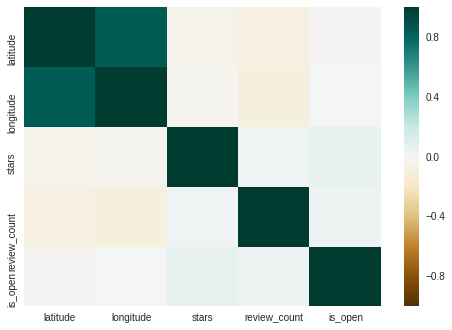

In [78]:
plt.figure()
sns.heatmap(b.corr(), cmap="BrBG")
plt.show()

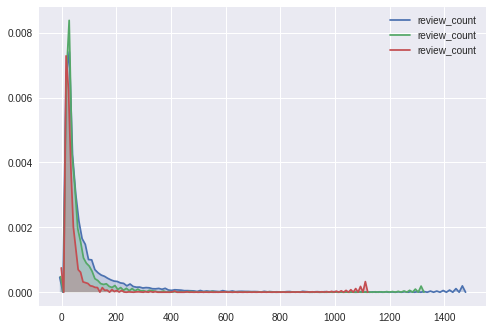

In [100]:
plt.figure()
bcut = b[b['review_count'] < 1500]
sns.kdeplot(bcut[bcut['stars'] == 4]['review_count'], shade=True)
sns.kdeplot(bcut[bcut['stars'] == 3]['review_count'], shade=True)
sns.kdeplot(bcut[bcut['stars'] == 2]['review_count'], shade=True)
plt.show()

In [12]:
del b

In [13]:
c.execute('SELECT column_name FROM information_schema.columns WHERE table_name="user"')
ucols = [r[0] for r in c.fetchall()]
ucols

['id',
 'name',
 'review_count',
 'yelping_since',
 'useful',
 'funny',
 'cool',
 'fans',
 'average_stars',
 'compliment_hot',
 'compliment_more',
 'compliment_profile',
 'compliment_cute',
 'compliment_list',
 'compliment_note',
 'compliment_plain',
 'compliment_cool',
 'compliment_funny',
 'compliment_writer',
 'compliment_photos']

In [14]:
c.execute('SELECT * FROM user')
u = pd.DataFrame(c.fetchall(), columns=ucols)

In [18]:
u.sort_values(by='fans', ascending=False).head(15)

,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
76416,37cpUoM8hlkSQfReIEBd-Q,Mike,1411,2009-04-25,1601,329,447,6087,4.20,330,86,48,104,26,369,604,848,848,443,1176
479212,hizGc5W1tBHPghM5YKCAtg,Katie,1287,2009-05-22,13057,1305,9316,2344,4.19,6151,396,396,359,251,2745,13123,6912,6912,2381,1303
519022,iLjMdZi0Tm7DQxX1C1_2dg,Ruggy,2190,2007-07-31,72297,12856,71669,2052,3.94,2555,274,270,339,117,2244,8311,4918,4918,1318,562
370534,eKUGKQRE-Ywi5dY55_zChg,Cherylynn,1896,2008-01-20,48704,47562,47190,1837,3.66,19988,1576,2102,1078,336,6340,11685,16710,16710,7117,33297
971245,UsXqCXRZwSCSw0AT7y1uBg,Candice,2560,2008-01-25,25183,24919,25039,1813,3.93,3442,273,297,370,157,1639,5151,3292,3292,1347,860
702771,nkN_do3fJ9xekchVC-v68A,Jeremy,1317,2004-10-12,31460,3706,3301,1770,3.69,1317,169,144,248,44,805,1208,1947,1947,422,483
994992,VHdY6oG2JPVNjihWhOooAQ,Jessica,1811,2005-07-21,38854,1564,20113,1763,4.19,5793,348,370,951,150,1600,7436,6295,6295,2075,502
528070,ITa3vh5ERI90G_WP4SmGUQ,Peter,2616,2008-05-06,48832,17536,44029,1721,3.95,2268,351,332,328,339,2285,7827,4149,4149,1476,434
770148,peuxbSQwXed-81cSqL7Ykw,Brittany,1450,2011-04-13,9927,9361,9765,1616,4.21,1557,183,139,194,73,1078,4665,2562,2562,1384,426
431738,G9Vb6yQ047TC3O_-GG4WZA,Connie,1538,2005-10-05,21626,9984,19643,1524,4.16,6845,216,229,1339,124,1133,4260,4522,4522,945,853


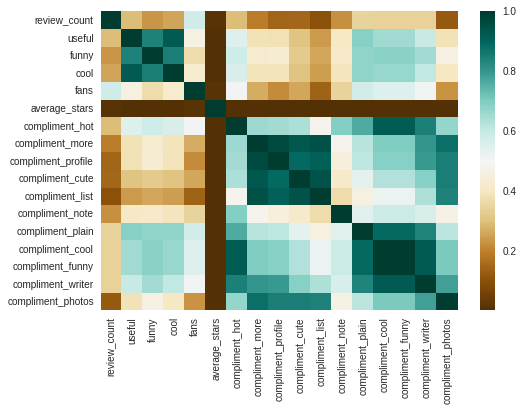

In [81]:
plt.figure()
sns.heatmap(u.corr(), cmap="BrBG")
plt.show()

In [64]:
ucols = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars']

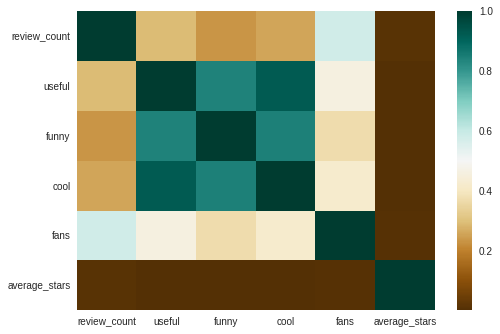

In [82]:
plt.figure()
sns.heatmap(u[ucols].corr(), cmap="BrBG")
plt.show()

In [48]:
upivot = pd.pivot_table(u, index=['review_count'],
                       columns=['average_stars'])

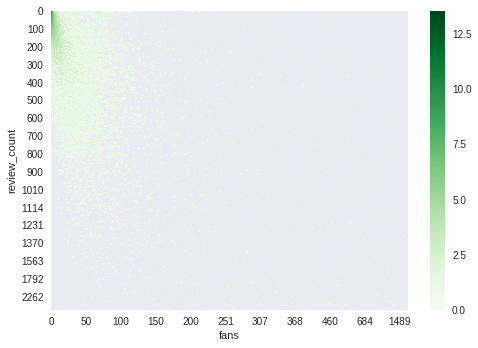

In [33]:
c.execute('SELECT column_name FROM information_schema.columns WHERE table_name="friends"')
ucols = [r[0] for r in c.fetchall()]
ucols

In [85]:
del u